### MA3402 Estadística
## Tarea 2, Entrega 1: Intervalos de confianza.

**Profesor:** Joaquín Fontbona T.

**Auxiliares:** Claudio López, Catalina Lizana G. & Fabián A. Ulloa

**Estudiantes:** Benjamín Ibarra Alemany, Antonia Valenzuela Castro, Bianca Zamora Araya.


In [ ]:
# Librerías necesarias
if(!require(Hmisc)){
    install.packages("Hmisc")
}

if(!require(ggplot2)){
    install.packages("ggplot2")
}

if(!require(latex2exp)){
    install.packages("latex2exp")
}

library(Hmisc)
library(ggplot2)
library(latex2exp)

Loading required package: Hmisc

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘Hmisc’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘Formula’


Loading required package: ggplot2

Loading required package: latex2exp

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘latex2exp’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




En esta tarea la idea es estimar la efectividad de vacunas contra el COVID-19 y además entregar sus respectivos intervalos de confianza. Para ello se tomarán datos reales de estudios realizados por laboratorios para las vacunas BNT162b2, ChAdOx1 y HBO2. En estos se consideran dos grupos de individuos, uno de control o placebo que es inyectado con solución salina sin anticuerpos, mientras que el otro grupo de vacunados recibe la vacuna a comercializar.

Los dos grupos se reparten de manera equitativa y el estudio es realizado en modalidad doble ciego, es decir, ni los individuos de experimento ni los agentes clínicos saben si se inyecta placebo o anticuerpos, por lo que se supone que los resultados finales son independientes del experimento en sí mismo.

*Nota: En lo que sigue se harán ciertas simplificaciones y se considerará, por ejemplo, que la vacuna tiene la misma efectividad contra todas las cepas de la enfermedad y que al mencionar contagios no se hará distinción entre sintomáticos y asintomáticos.*

### 1. Modelo

Denotemos a $T_0$ y $T_1$ la cantidad de individuos en el grupo placebo y de vacunados, respectivamente y $c_0$ y $c_1$ la cantidad de casos confirmados positivos de COVID-19 en el grupo placebo y de vacunados, respectivamente. Se define también por $c = c_0 + c_1$ la cantidad de contagiados totales después del estudio. Entonces suponemos que $c_1 \sim \text{Bin}(c, \pi)$, donde $\pi \in (0,1)$ es un parámetro desconocido.

Se define la proporción de tasa de incidencia o riesgo relativo como

$$ IRR = \frac{\pi}{r(1-\pi)} $$

Donde $r = T_1/T_0$ es el ratio de grupos de estudio. Y la efectividad de la vacuna se calcula como $VE = 1 - IRR$. Puede utilizar, sin demostrar, que si $(L_\pi, U_\pi)$ es un intervalo de confianza $(1-\alpha)\%$ para $\pi$ entonces el intervalo de confianza $(1-\alpha)\%$ para VE es

$$ \left ( 1- \frac{U_\pi}{r(1-U_\pi)}, \, 1- \frac{L_\pi}{r(1-L_\pi)} \right )$$

**1.1 Sea $g(p) =1- \frac{p}{r(1-p)}$. Sean $X_1, ..., X_n$ i.i.d. Bernoulli de parámetro $p \in (0,1)$. Sabemos que $\overline X_n = \frac{1}{n} \sum_{i=1}^n X_i$ es el MLE de $p$. Utilice el siguiente código que genera 10000 muestras Binomial de tamaño $n=1000$ y parámetro $p=0.4$ y genera un histograma de $\sqrt{n}(g(\overline X_n)-g(p))$. En base a este gráfico, solo responda**

* ¿A qué ley parece conveger $\sqrt{n}(g(\overline X_n)-g(p))$ cuando $n \to \infty$? Para visualizar mejor la distribución límite, además de apoyarse en el gráfico, calcule la media y varianza empíricas.
* ¿A qué teoremas del curso se puede deber esto?

*Indicación: Para ver numéricamente la varianza puede utilizar la función de R que calcula la varianza muestral, sea sesgada o insesgada, y aplicarla a g_samples. Le puede ser de utilidad que la información de Fisher para una muestra única de una Bernoulli es $I(p) = 1/(p(1-p))$.*

In [ ]:
# Función que dado un DataFrame df y una columna col de este
# Hace un histograma de dicha columna.
# Está pensado para hacer el histograma de sqrt(n)(g(X_n) - g(p))
plot.hist.p1 <- function(df, col) {
    ggplot(df, aes(x=col)) +
    geom_histogram(aes(y=after_stat(density)) ,bins = 40) +
    geom_vline(aes(xintercept=mean(g_samples)),
            color="blue", linetype="dashed") +
    geom_density(alpha=.2, fill="#FF6666") +
    labs(title=TeX("Muestras normalizadas al aplicar $g$"),x=TeX("$sqrt(n)(g(X_n) - g(p))$"), y = "Densidad") +
    theme(plot.title = element_text(hjust = 0.5))
}

In [ ]:
# Función g, que puede ser de utilidad para los cálculos posteriores
g <- function(p) {
    1 - p/(r*(1-p))
}

r <- 1 # Factor r

n_samples <- 10000 # Cantidad de muestras
size <- 1000 # Tamaño de las binomiales
prob <- 0.4 # Valor p real

# Muestras de binomiales
samples <- rbinom(n=n_samples, size=size, prob=prob)

# Muestras de binomiales reajustadas a su tamaño
resize_samples <- samples/size
# Objeto a estudiar su ley
g_samples <- sqrt(size)*(g(resize_samples) - g(prob))

# DataFrame con los resultados numéricos
df <- data.frame(g_samples)

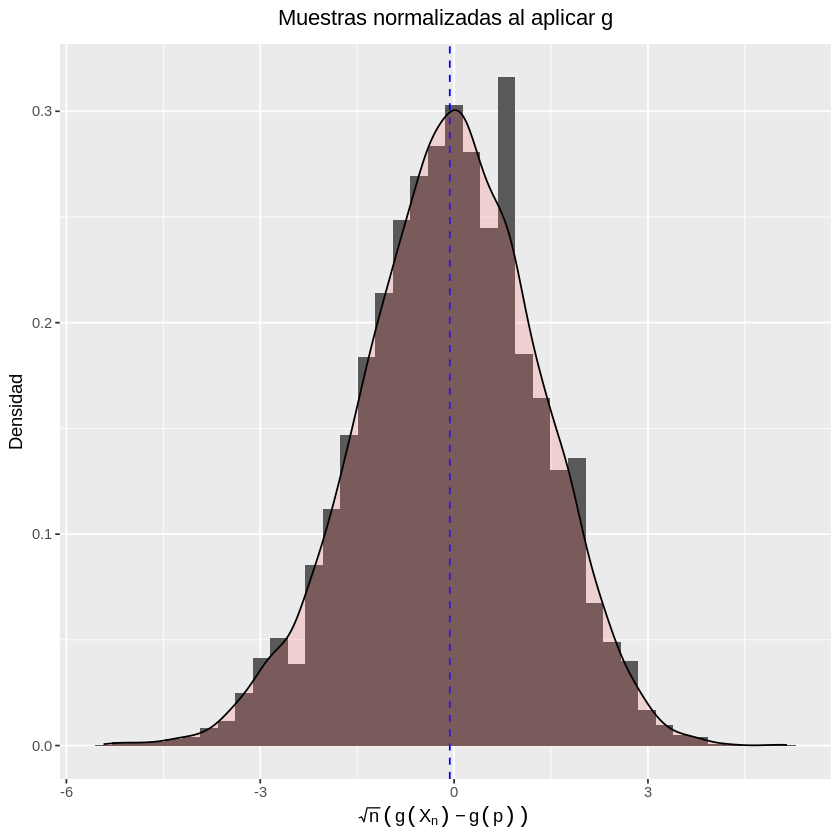

In [ ]:
plot.hist.p1(df, g_samples)

**Respuestas:**
Ya que el histograma es una representación de la distribución de probabilidad de una variable aleatoria, como en este caso el gráfico asemeja al de una normal, entonces cuando $n \to \infty$ la ley de $T := \sqrt{n}\left(g\left(\bar{X}_{n}\right)-g(p)\right)$ es como una normal.

En particular, por el gráfico, pareciera que es simétrica con respecto a un valor a la izquierda de cero, por lo que esa sería su esperanza; además, la desviación estándar, por como se acumula la densidad, pareciera estar a la izquierda de 1,5 por el desplazamiento de la gráfica. Esto se puede comprobar usando las funciones que calculan esperanza y varianza empíricos de una muestra, siendo aprox. -0,0016 y 1,8815 respectivamente (va a variar en cada simulación; ver celda de código más abajo).

El resultado anterior se debe a la teoría de estimadores de máxima verosimilitud que son asintóticamente normales y sirven como pivote para construir intervalos de confianza.

Por otro lado, como en realidad queremos ver la convergencia bajo una función $g$, esto es, $ \sqrt{n}(g(\overline{X}_{n})-g(p)) \overset{\textrm{Ley}}{⟶} \mathcal{N}(0,\mathbb{V}(X_{1})\cdot (g'(p))^{2}) $, no podemos concluir directamente por TCL, para lo cual se utiliza el _Delta method_:

 En efecto, se define $g\colon \mathbb{R}\to \mathbb{R}$ como $u \mapsto g(u)=1-\dfrac{u}{r(1-u)}$. Vemos directamente que es de clase $\mathcal{C}^{1}$ y que $g'(u)=- \tfrac{1}{r(u-1)^{2}}$. Como la derivada nunca se anula, tenemos que $g'(p)\neq 0$. Luego, la convergencia es

 \begin{equation*}
    \sqrt{n}(g(\overline{X}_{n})-g(p))\underset{n\to \infty}{\overset{\textrm{Ley}}{⟶}} \mathcal{N}\left(0,\tfrac{p}{r^{2}(1-p)^{3}}\right),
 \end{equation*}

 donde usamos que $\mathbb{V}(X_{1})=p(1-p)$. Reemplazando los valores $p=0.4$ y $r=1$, obtenemos finalmente,

 \begin{equation*}
        \sqrt{n}(g(\overline{X}_{n})-g(p)) \overset{\textrm{Ley}}{⟶} \mathcal{N}(0, 1.85).
 \end{equation*}


In [ ]:
#Calculamos la varianza 'asintótica' empírica de T
e_empirica_g_samples <- mean(g_samples)
v_empirica_g_samples <- var(g_samples)
#imprimir esperanza empírica
sprintf('media empírica: %f', e_empirica_g_samples) #%f es para imprimir floats
#imprimir varianza empírica
sprintf('varianza empírica: %f', v_empirica_g_samples) #%f es para imprimir floats

#Luego, para calcular la varianza asintótica teórica de T, primero determinamos la derivada de g,
dg <- function(p) {
    -1/(r*(1-p)**2)
}

I_inverso <- function(p) {(p*(1-p))
}
#Calculamos la inversa de la info de Fisher del estimador de máxima verosimilitud Xn barra, pues es asintóticamente normal
#con ello eficiente, y alcanza su cota de Cramer Rao
P<- I_inverso(prob)

#Veamos que esto se cumple
v_teorica <- P*(dg(prob)**2)
sprintf('varianza asintótica teórica: %f', v_teorica) #%f es para imprimir floats

[1] "media empírica: -0.066521"

[1] "varianza empírica: 1.830902"

[1] "varianza asintótica teórica: 1.851852"

Vemos que el valor empírico de la varianza del estimador $T$ se acerca bastante al valor estimado teóricamente por el _Delta Method_. Por otro lado, sabemos que $\overline{X}_{n}$ es estimador de máxima verosimilitud para $p\in (0,1)$, y es, además, insesgado y eficiente. Con ello sabemos que varianza de las variables Bernoulli $\mathbb{V}(X_{1})=p(1-p)$ y alcanzan la cota de Cramer Rao. Con ello, se puede calcular teóricamente la varianza del estimador $T$ usando la información de Fisher, tal como se hizo en el código.

### 2. Intervalo de confianza con aproximación por TCL (asintótico)

En lo que sigue se harán los cálculos para intervalos de confianza para distintos $1-\alpha$ y distintos métodos para obtenerlo. Para ello utilizaremos los siguientes datos.

In [ ]:
vaccines <- c('BNT162b2', 'ChAdOx1', 'HBO2')
nPlacebo <- c(17511, 2025, 12737)
nVaccine <- c(17411, 2063, 12726)
nPlaceboCases <- c(162, 33, 95)
nVaccineCases <- c(8, 12, 21)

#se agregan nombres a las columnas para identificar mejor la información según el contexto del enunciado
VaccineData <- data.frame('T0'=nPlacebo, 'T1'=nVaccine, 'c0'=nPlaceboCases, 'c1'=nVaccineCases, row.names = vaccines)
VaccineData$c <- VaccineData$c0 + VaccineData$c1 #se agrega columna con los nCases en total (c = c1+c2) i.e. total de infectados (placebo+vacunados)
VaccineData$r <- VaccineData$T1 / VaccineData$T0 #se agrega columna con factor r=T1/T0

VaccineData

,T0,T1,c0,c1,c,r
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BNT162b2,17511,17411,162,8,170,0.9942893
ChAdOx1,2025,2063,33,12,45,1.0187654
HBO2,12737,12726,95,21,116,0.9991364


**2.1 Usted sabe que el intervalo de confianza asintótico de nivel $(1-\alpha)$% para el parámetro $\pi$ de una $\text{Bin}(c,\pi)$ está dado por**

$$\left (  c_1 /c - z_{\alpha/2} \frac{\sqrt{( c_1 / c)(1-( c_1 / c))}}{\sqrt{c}},  c_1 /c + z_{\alpha/2} \frac{\sqrt{( c_1 / c)(1-( c_1 / c))}}{\sqrt{c}} \right)$$

**donde $c_1$ es la cantidad observada de infectados vacunados. Este intervalo está centrado en la estimación del parámetro $\pi$ que viene dada por $c_1/c$.**

**Calcule, numéricamente, los intervalos de confianza asintóticos $(1-\alpha)$% para el parámetro $\pi$ para las 3 vacunas para $\alpha \in \{0.2, 0.1, 0.05, 0.01\}$.**



Primero se va a generar la función que calcule los intervalos de confianza asintóticos de manera genérica.

In [ ]:
#asymptotic_CI: float, float, float -> vector
#dados 3 números (cantidad de vacunados, total infectados, riesgo), retorna intervalo de confianza (vector)
asymptotic_CI <- function(c1, c, alpha) {
    #la idea será reconstruir los límites inferior y sup
    div <- c1/c #se define el cociente
    z_alpha <- qnorm(1 - alpha / 2) #se guarda el cuartir normal
    frac <- sqrt(div*(1-div))/sqrt(c) #se define el término fraccionario
    lower_limit <- div - z_alpha*frac #se define límite inferior
    upper_limit <- div + z_alpha*frac #se define límite superior
    return(c(lower_limit, upper_limit)) #se retorna como vector
}

Ahora se calculará para las 3 vacunas en todos los casos.

In [ ]:
alphas <- c(0.2, 0.1, 0.05, 0.01) #arreglo para todos los valores de alpha que se quiere calcular

#para guardar la información sobre el intervalo de confianza, se puede:

#A) depositar directamente como un vector, para cada vacuna (fila)
#(en este caso, luego para transformarlos, habrá que acceder no solo a la fila [i] si no que a la componente iesima [[i]])
for (alpha in alphas) { #la idea es crear una nueva columna que almacene los valores iniciales y finales del intervalo de confianzapara cada vacuna
  VaccineData[[paste0('IC_alpha_', alpha)]] <- lapply(1:nrow(VaccineData), function(i) { #se guarda en el data frame columna de nombre IC_alpha correspondiente
    asymptotic_CI(VaccineData$c1[i], VaccineData$c[i], alpha) #se visita el data frame por filas y se aplica la función que calcula el IC
  })
}

#B) guardar en columnas separadas el limite inferior y superior para cada vacuna (fila)
#(en este caso, para transformarlos, basta acceder a la columna correspondiente)
for (alpha in alphas) {
  VaccineData[[paste0('IC_alpha_', alpha, '_Lower')]] <- sapply(1:nrow(VaccineData), function(i) {
    asymptotic_CI(VaccineData$c1[i], VaccineData$c[i], alpha)[1]
  })

  VaccineData[[paste0('IC_alpha_', alpha, '_Upper')]] <- sapply(1:nrow(VaccineData), function(i) {
    asymptotic_CI(VaccineData$c1[i], VaccineData$c[i], alpha)[2]
  })
}
VaccineData

,T0,T1,c0,c1,c,r,IC_alpha_0.2,IC_alpha_0.1,IC_alpha_0.05,IC_alpha_0.01,IC_alpha_0.2_Lower,IC_alpha_0.2_Upper,IC_alpha_0.1_Lower,IC_alpha_0.1_Upper,IC_alpha_0.05_Lower,IC_alpha_0.05_Upper,IC_alpha_0.01_Lower,IC_alpha_0.01_Upper
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<list>,<list>,<list>,<list>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BNT162b2,17511,17411,162,8,170,0.9942893,"0.02624436, 0.06787329","0.02034375, 0.07377390","0.01522585, 0.07889180","0.005223205, 0.088894442",0.02624436,0.06787329,0.02034375,0.0737739,0.01522585,0.0788918,0.005223205,0.08889444
ChAdOx1,2025,2063,33,12,45,1.0187654,"0.1821845, 0.3511488","0.1582350, 0.3750983","0.1374624, 0.3958710","0.09686345, 0.43646988",0.18218453,0.35114881,0.15823501,0.3750983,0.13746238,0.3958710,0.096863454,0.43646988
HBO2,12737,12726,95,21,116,0.9991364,"0.1352181, 0.2268508","0.1222298, 0.2398391","0.1109644, 0.2511046","0.0889468, 0.2731222",0.13521813,0.22685084,0.12222983,0.2398391,0.11096441,0.2511046,0.088946800,0.27312217


**2.2 Con el cálculo de la parte anterior, encuentre una estimación para la efectividad (VE) de las tres vacunas junto con sus intervalos de confianza $(1-\alpha)$% para $\alpha \in \{ 0.2, 0.1, 0.05, 0.01\}$. Realice un gráfico para cada vacuna, en estos gráficos incluya el cálculo de su intervalo de confianza, para ello utilice la función más abajo.**

In [ ]:
# Función para transformar las cotas superior e inferior del intervalo de confianza
# Le puede ser de utilidad, sin embargo no es necesario utilizarla.
# Recuerde calcular el factor r, por defecto la función lo dejará como r=1, pero usted debe
# calcularlo de acuerdo a los datos y según la definición de r al comienzo.

transform <- function(x, r=1) {
    1 - x/(r*(1-x))
}

#se guarda la info de la estimación de efectividad VE en el mismo dataframe
for (alpha in alphas) {
  #Lower_VE: cota inferior del IC para la efectividad (VE)
  VaccineData[[paste0('VE_', alpha, '_Lower')]] <- sapply(1:nrow(VaccineData), function(i) {
    # pi_lower <- VaccineData[[paste0('alpha_', alpha)]][[i]][1] #caso A)
    pi_lower <- VaccineData[[paste0('IC_alpha_', alpha, '_Lower')]][i] #caso B)
    r <-  VaccineData$r[i]
    transform(pi_lower, r) #se transforma la cota inferior del IC para obtener VE
  })

  #Upper_VE: cota superior del IC para la efectividad (VE)
  VaccineData[[paste0('VE_', alpha, '_Upper')]] <- sapply(1:nrow(VaccineData), function(i) {
    # pi_upper <- VaccineData[[paste0('alpha_', alpha)]][[i]][2] #caso A)
    pi_upper <- VaccineData[[paste0('IC_alpha_', alpha, '_Upper')]][i] #caso B)
    r <-  VaccineData$r[i]
    transform(pi_upper, r) #se transforma la cota superior del IC para obtener VE
  })

  #Means_VE: estimación del parámetro como el promedio c1/c
  VaccineData[[paste0('VE_', alpha, '_Mean')]] <- sapply(1:nrow(VaccineData), function(i) {
    div <- VaccineData$c1[i] / VaccineData$c[i]
    r <- VaccineData$r[i]
    transform(div, r)
  })
}

VaccineData

,T0,T1,c0,c1,c,r,IC_alpha_0.2,IC_alpha_0.1,IC_alpha_0.05,IC_alpha_0.01,⋯,VE_0.2_Mean,VE_0.1_Lower,VE_0.1_Upper,VE_0.1_Mean,VE_0.05_Lower,VE_0.05_Upper,VE_0.05_Mean,VE_0.01_Lower,VE_0.01_Upper,VE_0.01_Mean
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<list>,<list>,<list>,<list>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BNT162b2,17511,17411,162,8,170,0.9942893,"0.02624436, 0.06787329","0.02034375, 0.07377390","0.01522585, 0.07889180","0.005223205, 0.088894442",⋯,0.9503337,0.9791145,0.9198925,0.9503337,0.9844499,0.9138593,0.9503337,0.9947192,0.9018720,0.9503337
ChAdOx1,2025,2063,33,12,45,1.0187654,"0.1821845, 0.3511488","0.1582350, 0.3750983","0.1374624, 0.3958710","0.09686345, 0.43646988",⋯,0.6430617,0.8154825,0.4108048,0.6430617,0.8435658,0.3567946,0.6430617,0.8947233,0.2397386,0.6430617
HBO2,12737,12726,95,21,116,0.9991364,"0.1352181, 0.2268508","0.1222298, 0.2398391","0.1109644, 0.2511046","0.0889468, 0.2731222",⋯,0.7787563,0.8606293,0.6842162,0.7787563,0.8750777,0.6644103,0.7787563,0.9022849,0.6239282,0.7787563


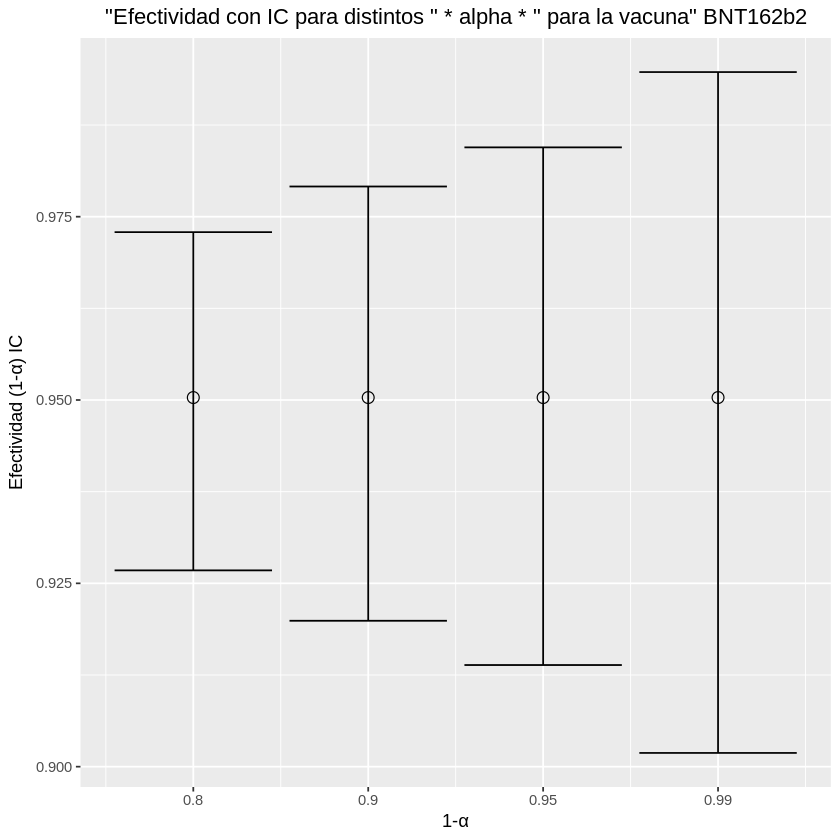

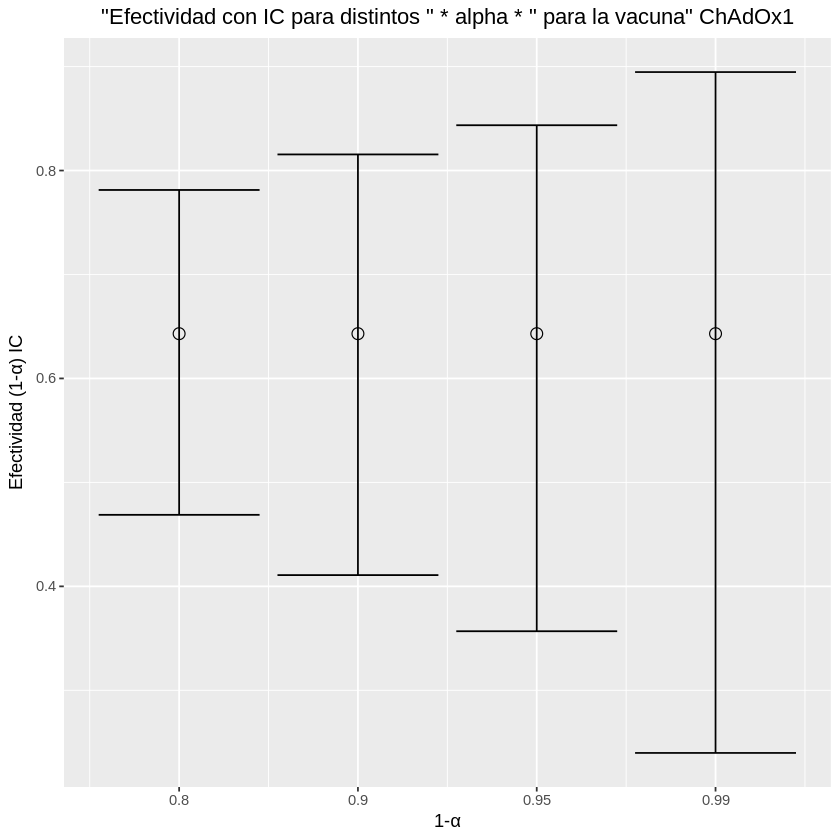

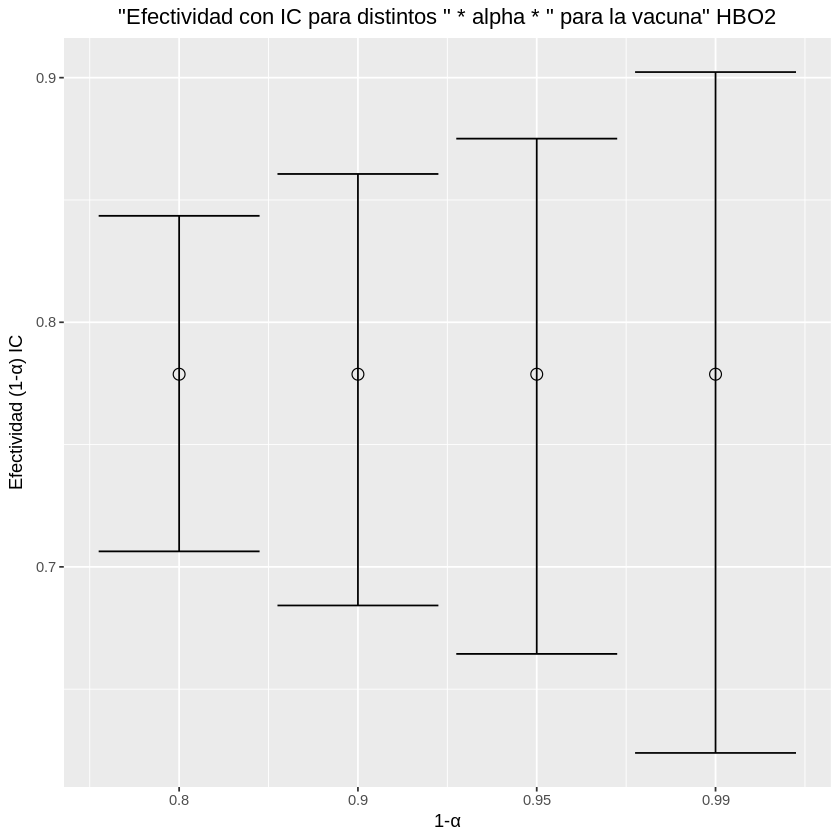

In [ ]:
# df: DataFrame con columnas Means_VE, Upper_VE, Lower_VE
# Means_VE: Estimación del parámetro como el promedio c1/c
# Upper_VE: Cota superior del IC para la efectividad (VE)
# Lower_VE: Cota inferior del IC para la efectividad (VE)
# alphas: Alphas utilizados para calcular los intervalo de confianza 1-alpha

# Esta función genera un gráfico de la estimación del parámetro junto con
# el intervalo de confianza en forma de barras de error

plot.ic.p2 <- function(df, Means_VE, Upper_VE, Lower_VE, alphas=c(0.2, 0.1, 0.05, 0.01), l) {
    ggplot(data=df, aes(x=1:nrow(df))) +
                geom_errorbar(aes(ymax = Upper_VE, ymin = Lower_VE)) +
                geom_point(aes(y=Means_VE), shape=1, size=3) +
                ylab(TeX("Efectividad (1-$\\alpha$) IC")) +
                xlab(TeX("1-$\\alpha$")) +
                scale_x_continuous(breaks=seq(1,4,1),labels=1-alphas) +
                ggtitle(paste(TeX("Efectividad con IC para distintos $\\alpha$ para la vacuna"),vaccines[l])) +
                theme(plot.title = element_text(hjust = 0.5))
}

for (i in 1:nrow(VaccineData)) {
  df <- data.frame(
    Means_VE = unlist(VaccineData[i, paste0('VE_', alphas, '_Mean')]),
    Upper_VE = unlist(VaccineData[i, paste0('VE_', alphas, '_Upper')]),
    Lower_VE = unlist(VaccineData[i, paste0('VE_', alphas, '_Lower')])
  )
  df$alpha_label <- factor(1:length(alphas), labels = 1 - alphas)
  plot <- plot.ic.p2(df, Means_VE = df$Means_VE, Upper_VE = df$Upper_VE, Lower_VE = df$Lower_VE,c(0.2, 0.1, 0.05, 0.01), i)
  print(plot)
}

**2.3 Comente sus resultados y responda ¿qué es lo que observa cuando disminuye $\alpha$?**

**Solución:**
La tendencia de los gráficos dice que en la medida que $\alpha \in (0,1)$ disminuye, vale decir, que $1-\alpha$ aumenta, la precisión con la que se puede indicar la efectividad va disminuyendo pues los intervalos pasan a ser más grandes.

### 3. Intervalo de confianza $95\%$ con distintos métodos

En contexto clínico se suelen presentar los resultados de la estimación de algún parámetro en conjunto con el intervalo de confianza del $95\%$. El objetivo de esta parte es poder entregar un intervalo de dicha confianza con distintos métodos existentes en la literatura, a pesar de que no los estudiaremos en el curso más allá de esta tarea. Gran parte de lo que sigue se basará en utilizar la función **binconf** de **Hmisc**, ya instalada al principio. La lista de métodos es la siguiente:

* **Método 1:** Método asintótico de la parte anterior.
* **Método 2:** Método exacto con distribución F de Fisher.
* **Método 3:** Método de Wilson.

**3.1 Con la función binconf obtenga, numéricamente, los intervalos de confianza de 95% para la efectividad de las 3 vacunas, utilizando el método 2 (exacto) y el método 3 (Wilson). Utilice la función entregada abajo para graficar.**

*Hint 1: Siga un procedimiento similar al de la sección anterior, es decir, calcule el intervalo de confianza para $\pi$ y luego con lo entregado en la sección 1 calcule los intervalos de confianza para la efectividad.*

*Hint 2: Busque la función **binconf** en internet y descubra como cambiar el método de cálculo del intervalo.*

Ya que se requiere usar el dataframe con los datos del estudio, se va a volver a instatar.

In [ ]:
vaccines <- c('BNT162b2', 'ChAdOx1', 'HBO2')
nPlacebo <- c(17511, 2025, 12737)
nVaccine <- c(17411, 2063, 12726)
nPlaceboCases <- c(162, 33, 95)
nVaccineCases <- c(8, 12, 21)

#se agregan nombres a las columnas para identificar mejor la información según el contexto del enunciado
VaccineData <- data.frame('T0'=nPlacebo, 'T1'=nVaccine, 'c0'=nPlaceboCases, 'c1'=nVaccineCases, row.names = vaccines)
VaccineData$c <- VaccineData$c0 + VaccineData$c1 #se agrega columna con los nCases en total (c = c1+c2) i.e. total de infectados (placebo+vacunados)
VaccineData$r <- VaccineData$T1 / VaccineData$T0 #se agrega columna con factor r=T1/T0

VaccineData

,T0,T1,c0,c1,c,r
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BNT162b2,17511,17411,162,8,170,0.9942893
ChAdOx1,2025,2063,33,12,45,1.0187654
HBO2,12737,12726,95,21,116,0.9991364


Siguiendo las indicaciones:

* Se seguirá un procedimiento análogo al anterior.
* La función ```bincof```(https://rdrr.io/cran/Hmisc/man/binconf.html) (Confidence Intervals for Binomial Probabilities), esta justamente produce intervalos de confianza $1-\alpha$ para probabilidades binomiales y recibe como argumentos, respectivamente: ```x``` vector con las realizaciones de variables aleatorias binomiales, ```n``` vector que indica la cantidad de observaciones, parámetro ```alpha``` que es el error que se quiere controlar, y el método (que en este caso puede ser ```'exact'``` o ```'wilson'```). Devuelve un dataframe con los valores calculados, donde la columna 2 y 3 son, respectivamente, lower y upper.

En este caso como se quiere $95\%$ de confianza, se requiere $\alpha = 0.05$.

In [ ]:
vaccines <- c('BNT162b2', 'ChAdOx1', 'HBO2') # Vacunas

#calc_VE_IC: vector, vector, float, float
#dadas realizaciones de variables aleatorias, la cantidad de observaciones, y error a controlar
#(y parametro ratio), se calculan intervalos de confianza con binconf
calc_VE_IC <- function(nVaccineCases, nTotalCases, alpha, r) {
  #se generan intervalos de confianza con binconf
  IC_pi_exact <- binconf(x=nVaccineCases, n=nTotalCases, alpha=alpha, method='exact')
  IC_pi_wilson <- binconf(x=nVaccineCases, n=nTotalCases, alpha=alpha, method='wilson')

  #se transforman los intervalos a la forma VE
  VE_exact_lower <- transform(IC_pi_exact[2], r = r)
  VE_exact_upper <- transform(IC_pi_exact[3], r = r)
  VE_wilson_lower <- transform(IC_pi_wilson[2], r = r)
  VE_wilson_upper <- transform(IC_pi_wilson[3], r = r)

  #se crea data frame con los resultados
  div <- nVaccineCases / nTotalCases #means se construye con la estimacion c1/c
  data.frame('Means_VE'= 1 - div/(r*(1 - div)), 'Lower_VE_Exact'=VE_exact_lower, 'Upper_VE_Exact'= VE_exact_upper, 'Lower_VE_Wilson'=VE_wilson_lower, 'Upper_VE_Wilson'=VE_wilson_upper)
}

#se calculan los intervalos de confianza para cada vacuna
alpha <- 0.05  #se setea el nivel de confianza
for (i in 1:nrow(VaccineData)) { #para cada vacuna
  nVaccineCases <- VaccineData$c1[i] #se accede a la info de la vacuna en la columna c1
  nTotalCases <- VaccineData$c[i] #se accede a la info de la vacuna en la columna c
  r <- VaccineData$r[i] #se accede al parámetro r en la columna r

  #se añaden al data frame
  VaccineData[i, c('Means_VE', 'Lower_VE_Exact', 'Upper_VE_Exact', 'Lower_VE_Wilson', 'Upper_VE_Wilson')] <- calc_VE_IC(nVaccineCases, nTotalCases, alpha, r)
}

VaccineData

,T0,T1,c0,c1,c,r,Means_VE,Lower_VE_Exact,Upper_VE_Exact,Lower_VE_Wilson,Upper_VE_Wilson
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BNT162b2,17511,17411,162,8,170,0.9942893,0.9503337,0.9789164,0.8997814,0.9752311,0.9004096
ChAdOx1,2025,2063,33,12,45,1.0187654,0.6430617,0.8321341,0.2908134,0.8135204,0.3167891
HBO2,12737,12726,95,21,116,0.9991364,0.7787563,0.8690533,0.6422517,0.8614899,0.6466050


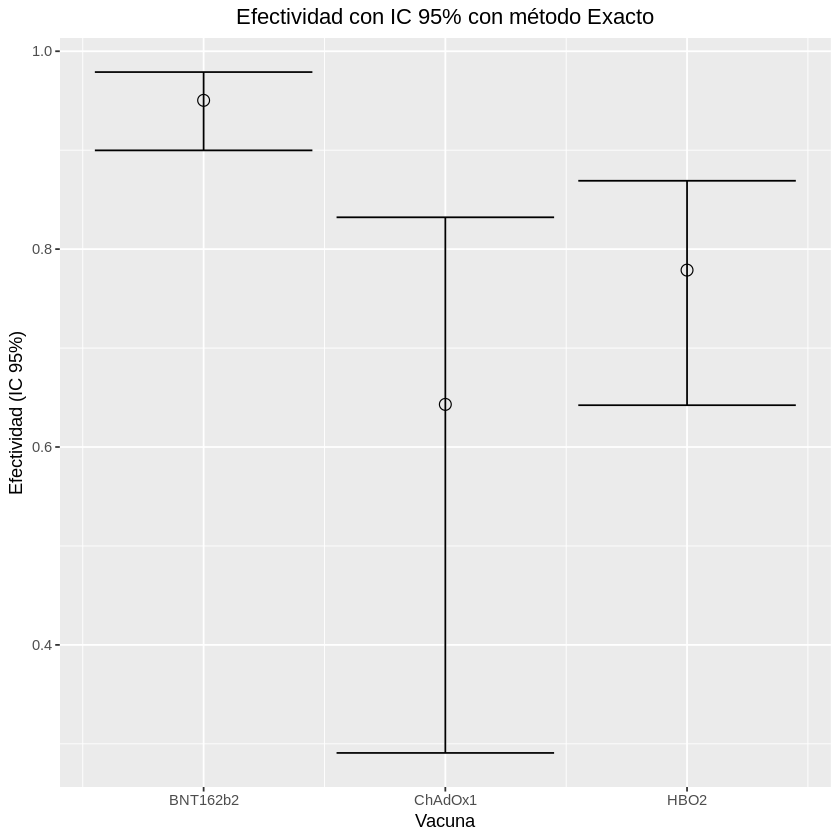

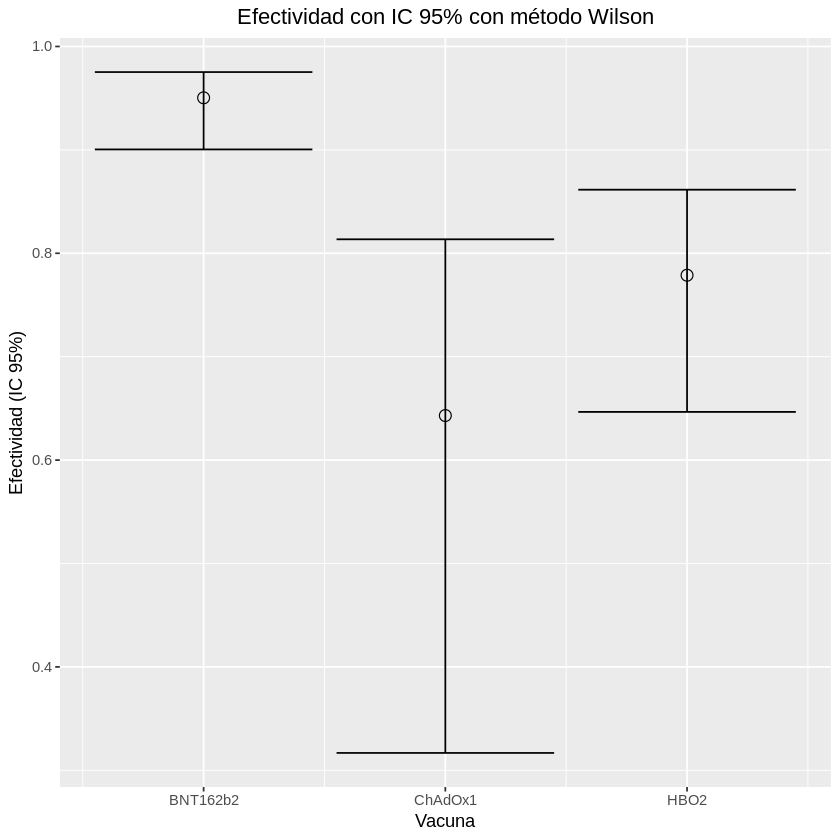

In [ ]:
# df: DataFrame con columnas Means_VE, Upper_VE, Lower_VE
# Means_VE: Estimación del parámetro como el promedio c1/c
# Upper_VE: Cota superior del IC para la efectividad (VE)
# Lower_VE: Cota inferior del IC para la efectividad (VE)
# vac_index: Índice de la vacuna en el arreglo vaccines,
# 1:'BNT162b2', 2:'ChAdOx1', 3:'HBO2'
# method: Un string que indique el método, en este caso puede ser
# "exacto" o "Wilson".

plot.ic.p3 <- function(df, Means_VE, Lower_VE, Upper_VE, vac_index, method) { #notar que el argumento
    ggplot(data=df, aes(x=1:nrow(df))) +
                geom_errorbar(aes(ymax = Upper_VE, ymin = Lower_VE)) +
                # geom_point(aes(y=rowMeans(df)), shape=1, size=3) +
                geom_point(aes(y=Means_VE), shape=1, size=3) + #se reemplaza por la línea anterior porque no graficaba correctamente
                ylab("Efectividad (IC 95%)") +
                xlab("Vacuna") +
                # ggtitle(cat("Efectividad con IC 95% ",method)) +
                ggtitle(paste0("Efectividad con IC 95% con método ",method)) + #se modificó estructura del gráfico por estética
                theme(plot.title = element_text(hjust = 0.5)) +
                scale_x_continuous(breaks=seq(1,3,1),labels=vaccines)
}

plot.ic.p3(df=VaccineData, Means_VE=VaccineData$Means_VE, Lower_VE=VaccineData$Lower_VE_Exact, Upper_VE=VaccineData$Upper_VE_Exact, vac_index=1, method='Exacto') #exact
plot.ic.p3(df=VaccineData, Means_VE=VaccineData$Means_VE, Lower_VE=VaccineData$Lower_VE_Wilson, Upper_VE=VaccineData$Upper_VE_Wilson, vac_index=1, method='Wilson') #wilson

**3.2 El/la ministro/a de salud de turno acude a usted para pedirle urgentemente números acerca de las tres vacunas ya que buscan comprar dosis para la siguiente campaña de vacunación. Además de la efectividad, le pide que le entregue su correspondiente intervalo de confianza. ¿Qué vacuna elegiría y que método para calcular su intervalo de confianza del 95\%?**

*Nota: No hay una respuesta correcta a esto, es solo una pregunta de discusión. Lo importante son los argumentos que usted pueda entregar.*

**Solución:**
Para hacer una elección adecuada sobre la vacuna, hay que considerar algunos aspectos como su efectividad, intervalo de confianza y el método con el cual calcular los parámetros anteriores. Respecto a la efectividad, se espera que una vacuna con mayor efectividad sea mejor para evitar los contagios. Sobre el intervalo de confianza, se quisiera que no fuese tan amplio para que así estén más localizados las posibles variaciones y la precisión sobre el parámetro de la efectividad sea más alta. En cuanto al método que elegir, el método asintótico requirió más modelamiento e implementación por detrás, mientras que el método de Wilson y Exacto venían implementados en librerías de R.

En virtud de lo anterior, elegiría el método Exacto o de Wilson para que la implementación fuese más directa. Ya que entregaron resultados similares para los intervalos de confianza, considerando que la efectividad más alta es la obtenida con la vacuna BNT162b2 y que además su intervalo de confianza es más chico (mayor precisión), esa sería la vacuna a elegir.